# 1.创建一个简单网络（图）

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 创建一个空图
G = nx.Graph()
# 向该图中添加节点和连边
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4)])

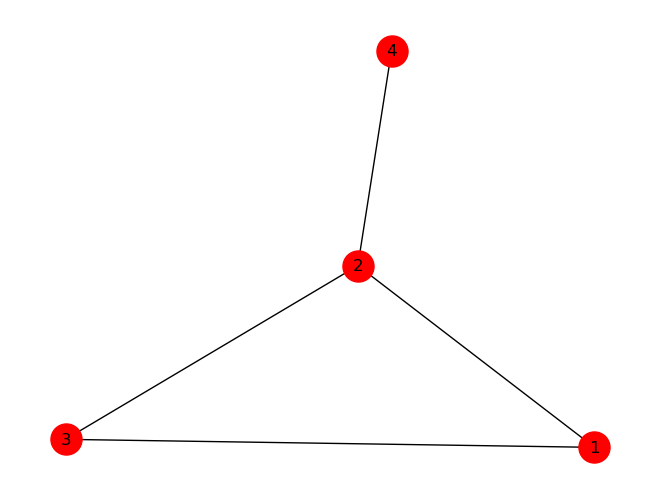

In [3]:
# 可视化图
nx.draw(G, node_size=500, node_color='red', with_labels=True)
plt.savefig("fig1.png", dpi=300)

# 2.获取网络（图）的邻接矩阵

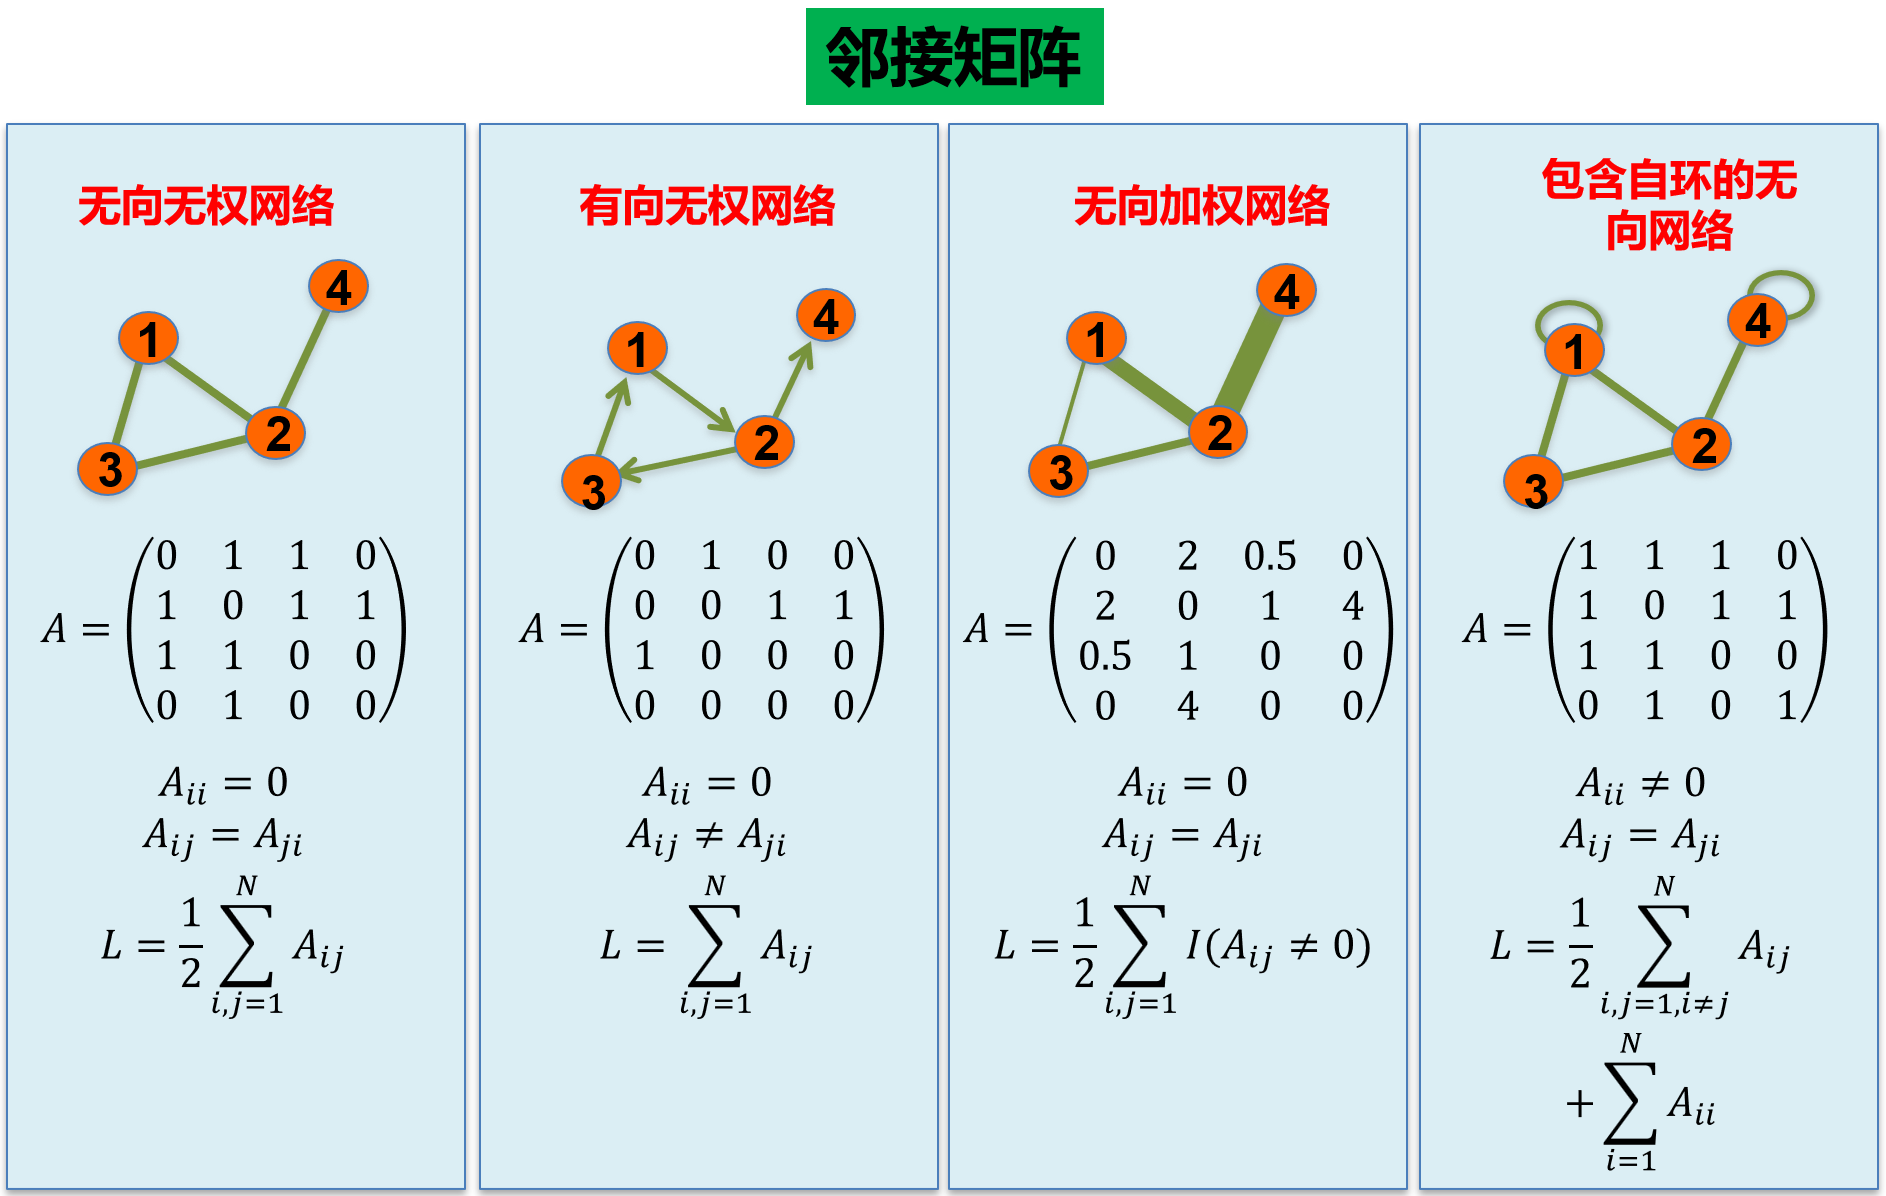

In [4]:
import networkx as nx

# 无向无权
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4)])

In [5]:
As = nx.adjacency_matrix(G)
print(As)

C:\Users\24365\AppData\Local\Temp\ipykernel_16576\36223340.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


注意：对于networkx2.6以后的版本（如2.7，2.8）无法正常打印As，
会出现：FutureWarning: adjacency_matrix will return a
scipy.sparse array instead of a matrix in Networkx 3.0.
但并不影响获取邻接矩阵。

In [6]:
# 获取二维邻接矩阵
A = As.todense()
A

matrix([[0, 1, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [0, 1, 0, 0]], dtype=int32)

In [7]:
# 有向无权
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(3,1),(2,4)])
As = nx.adjacency_matrix(G)
A = As.todense()
A

C:\Users\24365\AppData\Local\Temp\ipykernel_16576\1709250573.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


matrix([[0, 1, 0, 0],
        [0, 0, 1, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int32)

In [8]:
# 无向加权
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_weighted_edges_from([(1,2,2.0),(2,3,0.5),(3,1,1.0),(2,4,4.0)])
As = nx.adjacency_matrix(G)
A = As.todense()
A

C:\Users\24365\AppData\Local\Temp\ipykernel_16576\2025817479.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


matrix([[0. , 2. , 1. , 0. ],
        [2. , 0. , 0.5, 4. ],
        [1. , 0.5, 0. , 0. ],
        [0. , 4. , 0. , 0. ]])

In [9]:
# 无向带自环
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,1),(1,2),(2,3),(3,1),(2,4),(4,4)])
As = nx.adjacency_matrix(G)
A = As.todense()
A

C:\Users\24365\AppData\Local\Temp\ipykernel_16576\3477799048.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  As = nx.adjacency_matrix(G)


matrix([[1, 1, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [0, 1, 0, 1]], dtype=int32)

# 3.已知邻接矩阵A，生成A对应的网络

In [10]:
import networkx as nx
import numpy as np

In [12]:
# 小规模矩阵
A = np.array([[0, 1, 1, 0],
              [1, 0, 1, 1],
              [1, 1, 0, 0],
              [0, 1, 0, 0]], dtype=int)

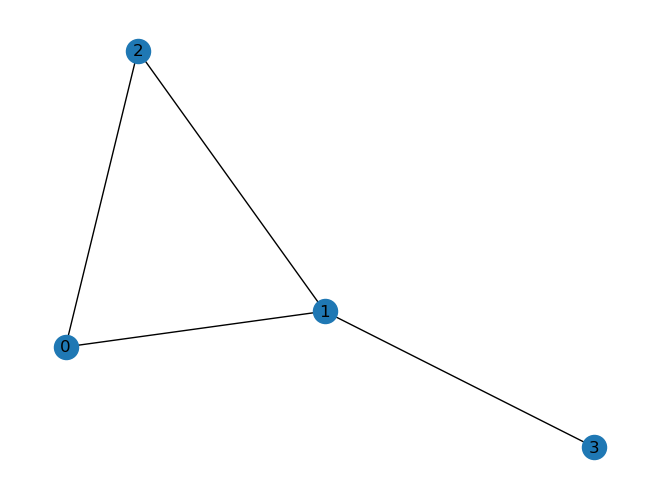

In [13]:
G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True)

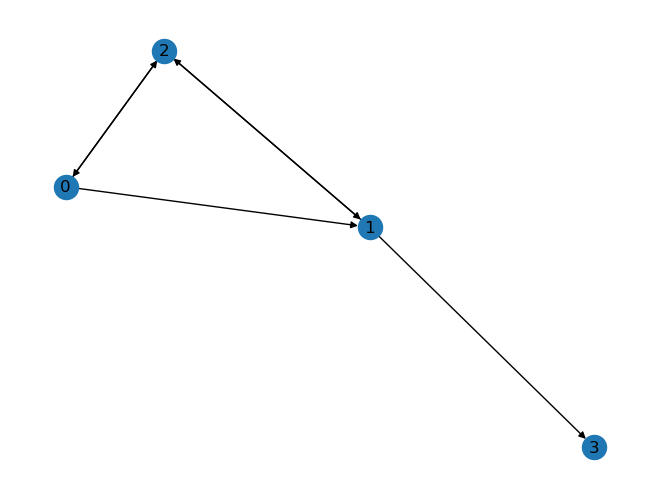

In [14]:
# 有向网络的情况也是类似的
DA = np.array([[0, 1, 1, 0],
              [0, 0, 1, 1],
              [1, 1, 0, 0],
              [0, 0, 0, 0]], dtype=int)
DG = nx.from_numpy_array(DA, create_using=nx.DiGraph())
nx.draw(DG, with_labels=True)

In [15]:
# 读取外部邻接矩阵数据
# import pandas as pd
# df = pd.read_csv("adjacency_matrix.csv", header=None, index_col=None)
# G = nx.from_pandas_adjacency(df)
# 若为有向网络
# G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph())

# 4.度、平均度以及度分布

我们使用ki表示网络中第i个节点的度

度分布pk表示“网络中随机选出的一个节点其度为k”的概率

< k >表示平均度

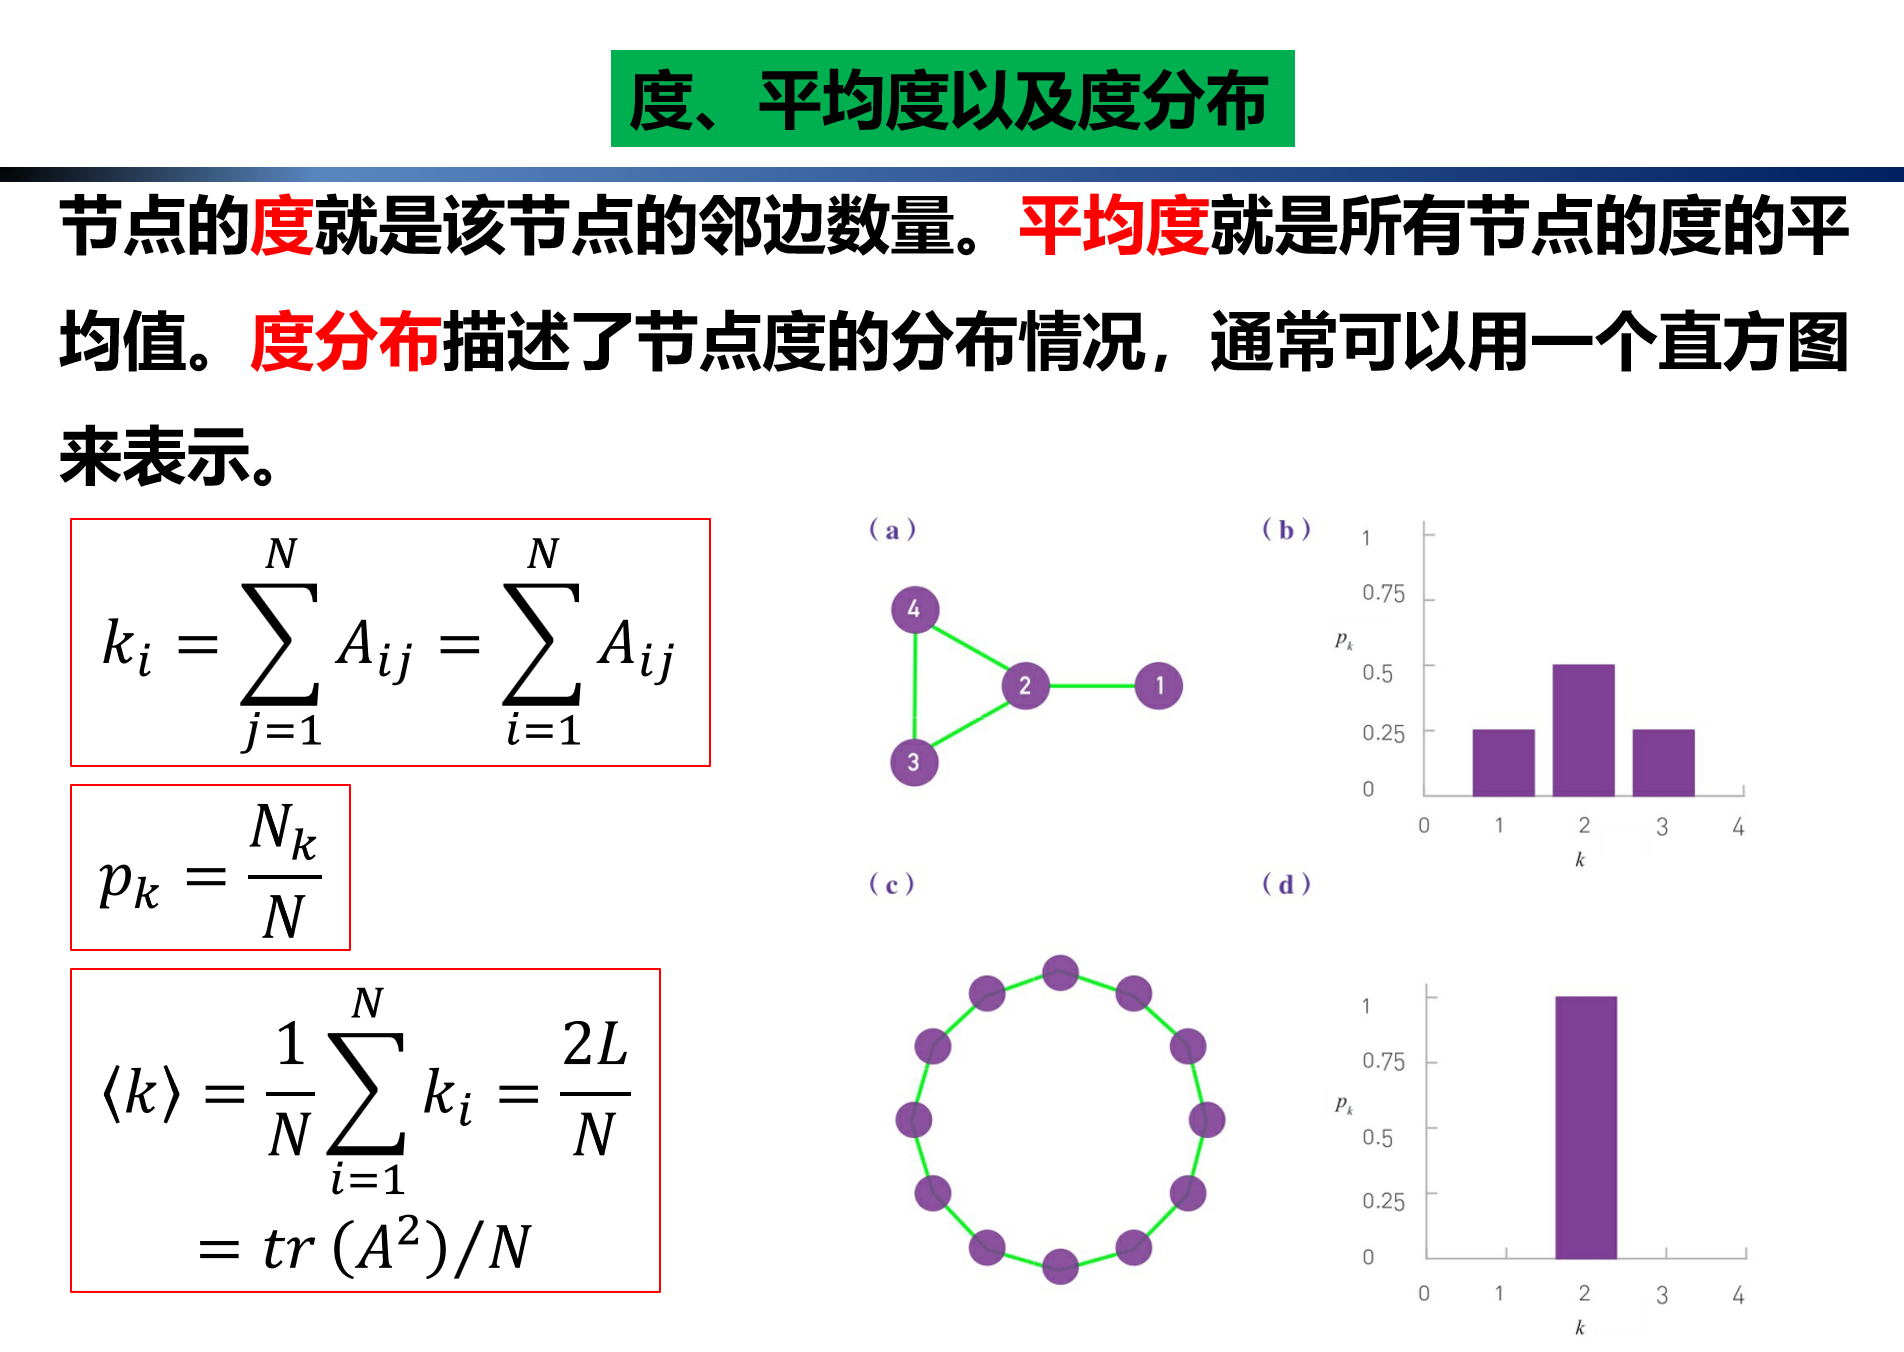

In [16]:
import networkx as nx
import numpy as np



### 4.1、无向无权网络

In [17]:
# 创建空图
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])

In [18]:
# 获取网络G的度
d = dict(nx.degree(G))
print(d)
# 获取网络G的平均度
print("平均度为：", 2*len(G.edges())/len(G.nodes))
# 或采用如下方式
print("平均度为：", sum(d.values())/len(G.nodes))

# 获取度值出现的频数：返回所有位于区间[0, dmax]的度值的频率列表
nx.degree_histogram(G)

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0
平均度为： 2.0


[0, 1, 2, 1]

### 绘制度分布直方图

In [19]:
# 导入绘图库
import matplotlib.pyplot as plt

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

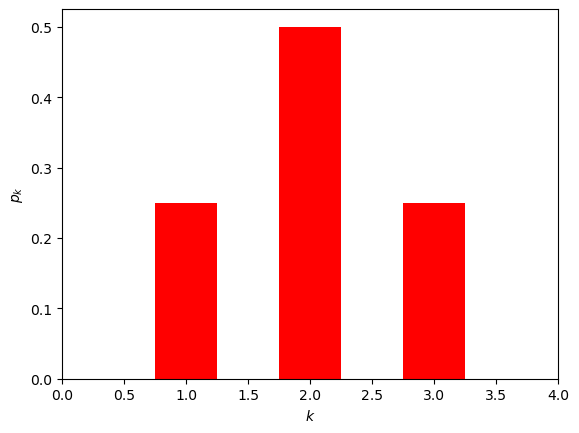

In [20]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,4])

### 4.2、无向加权网络

In [21]:
# 创建加权网络
WG = nx.Graph()
WG.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])

# 获取网络G的度
wd = dict(nx.degree(WG, weight='weight'))
print(wd)
# 获取网络WG的平均加权度
print("平均加权度为：", sum(wd.values())/len(G.nodes))

{0: 4.5, 1: 10.5, 2: 9.0}
平均加权度为： 6.0


### 4.3、有向网络

所有节点的入度为： {1: 0, 2: 1, 3: 3, 4: 1}
所有节点的出度为： {1: 2, 2: 1, 3: 1, 4: 1}


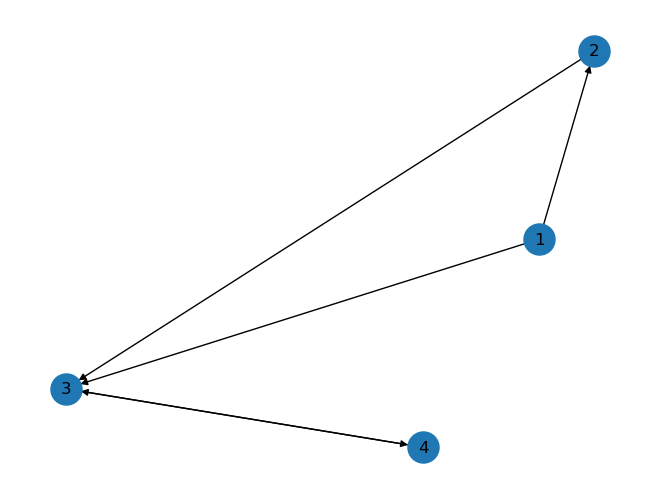

In [22]:
DG = nx.DiGraph()
# 添加节点
DG.add_nodes_from([1,2,3,4])
# 添加边
DG.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,3)])
nx.draw(DG, node_size=500, with_labels=True)

print("所有节点的入度为：", dict(DG.in_degree()))
print("所有节点的出度为：", dict(DG.out_degree()))

{1: 0, 2: 1, 3: 3, 4: 1}
[0, 1, 2, 3]
[1 2 0 1]


(-1.0, 4.0)

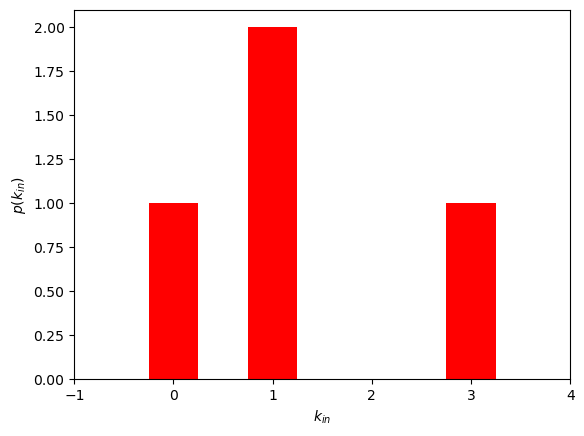

In [23]:
### 分别绘制入度和出度分布
di = dict(DG.in_degree())
print(di)
xi = list(range(max(di.values())+1))
yi = np.bincount(list(di.values()))
print(xi)
print(yi)

# 绘制入度频数分布直方图
plt.bar(xi, yi, width=0.5, color="red")
plt.xlabel("$k_{in}$")
plt.ylabel("$p(k_{in})$")
plt.xlim([-1,4])

# 出度分布与之类似

# 5.路径、距离、直径、效率和平均距离

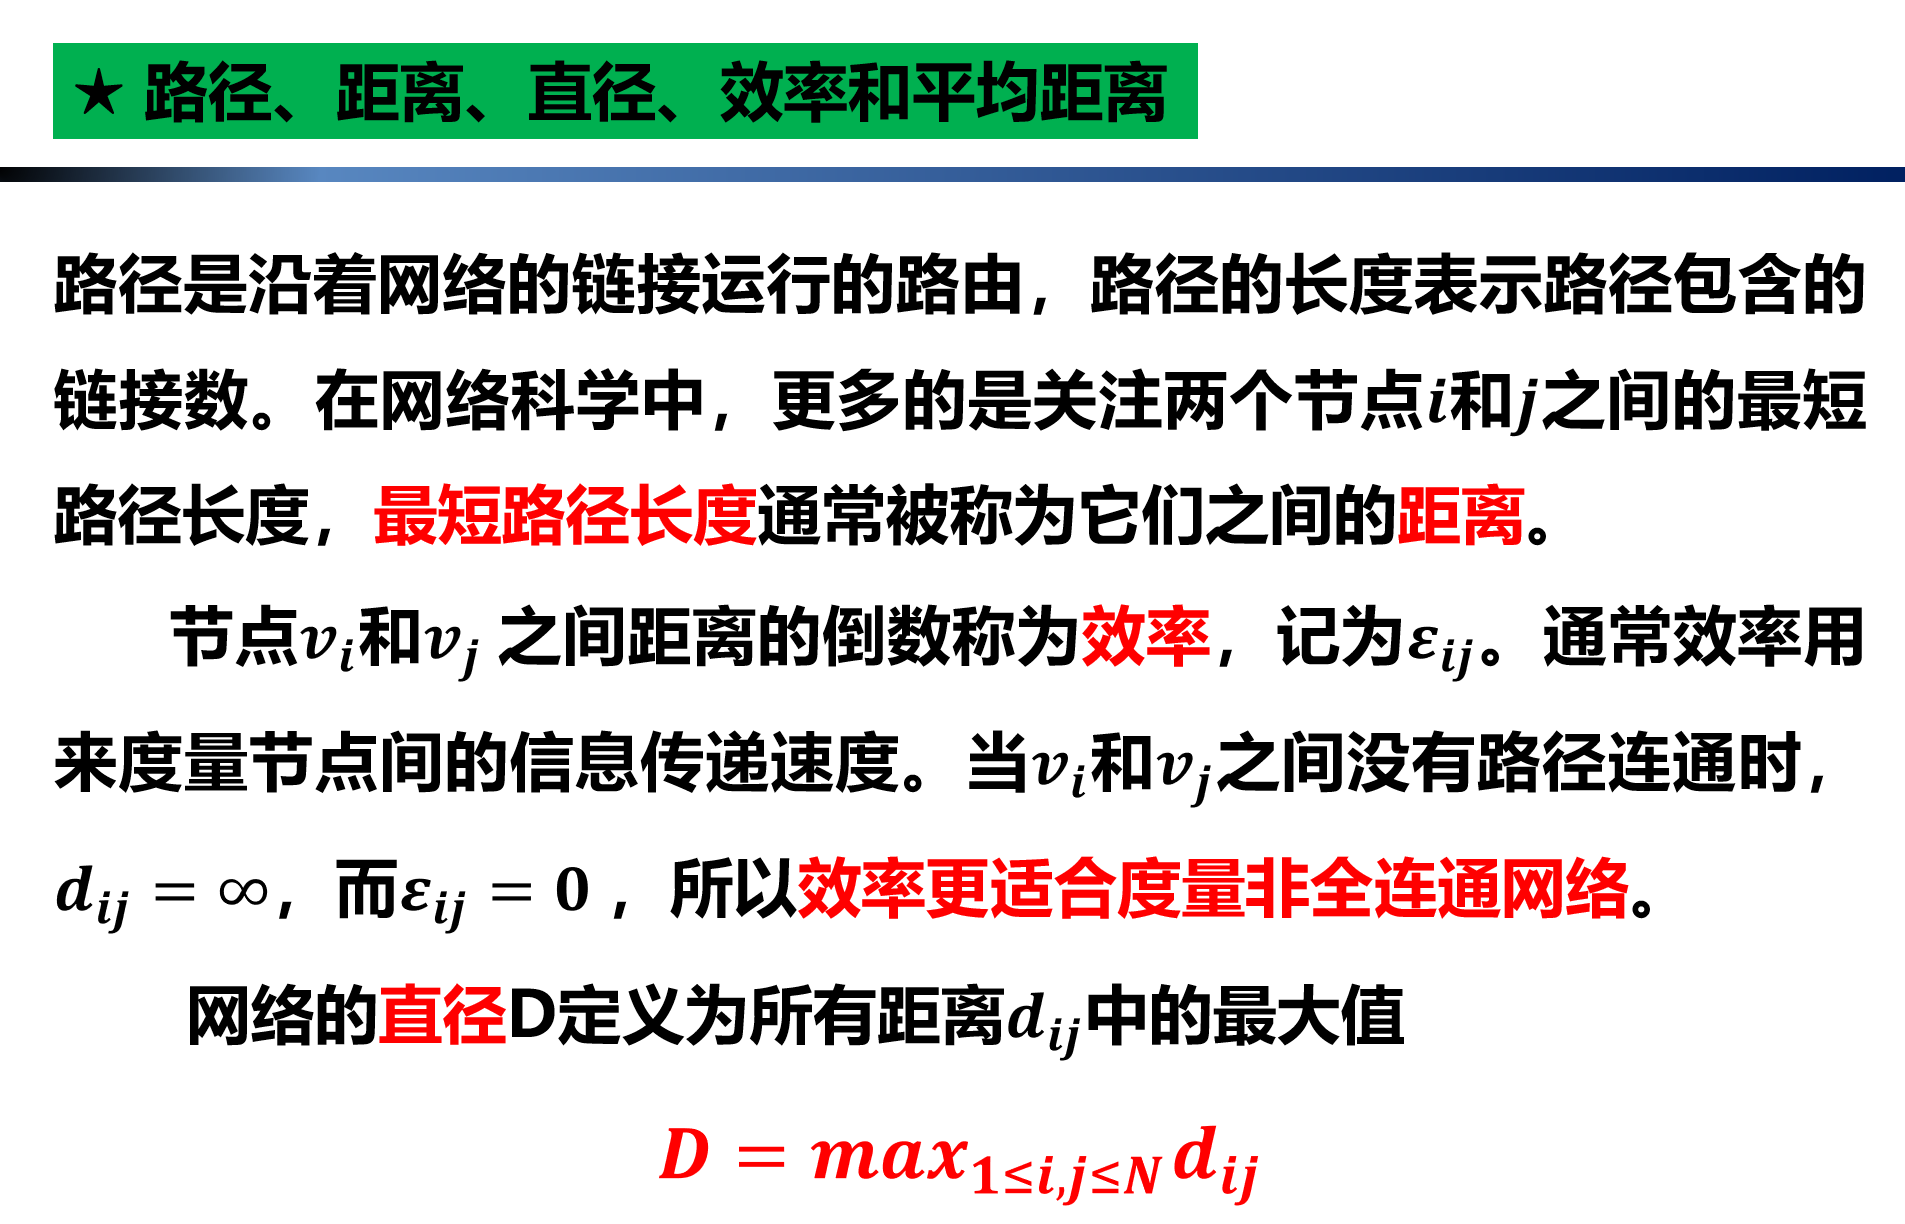
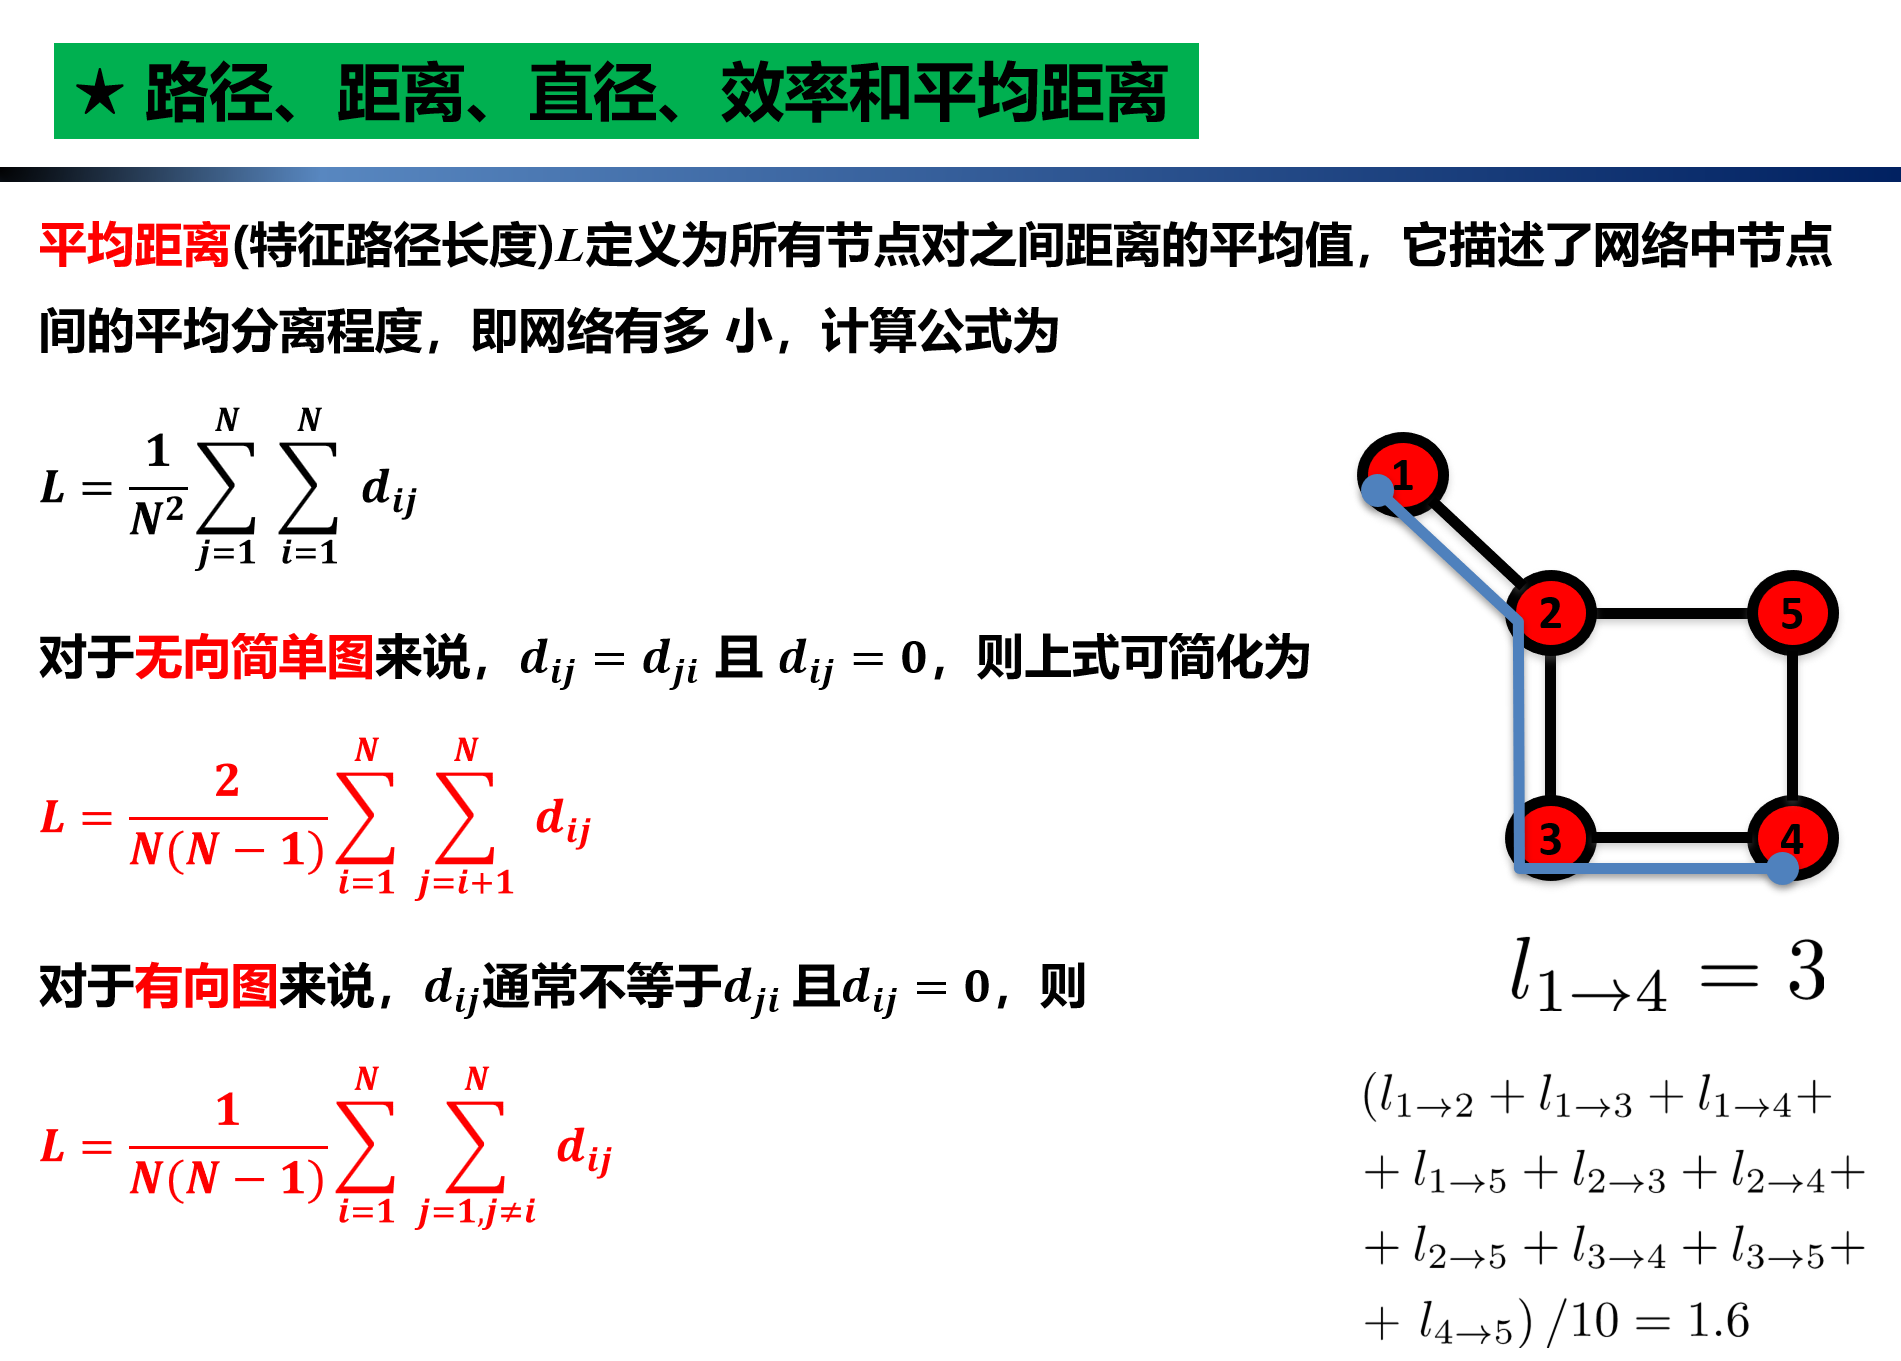

In [24]:
import networkx as nx
import numpy as np

### 5.1、无向无权网络

In [25]:
# 创建空图
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4,5])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,5),(3,4),(4,5)])

In [26]:
# 节点间的最短路径以及其长度
i, j = 1, 3
print(nx.shortest_path(G, i, j))
dij = nx.shortest_path_length(G, i, j)
dij

[1, 2, 3]


2

In [27]:
# 遍历所有节点间的最短路径长度
nodes = list(G.nodes())
for u in range(len(nodes)-1):
    for v in range(u+1, len(nodes)):
        i, j = nodes[u], nodes[v]
        if nx.has_path(G, i, j):
            dij = nx.shortest_path_length(G, i, j)
            print("节点{}和{}之间的最短路径长度为{}".format(i, j, dij))
        else:
            print("节点{}和{}之间没有路径！".format(i, j))

节点1和2之间的最短路径长度为1
节点1和3之间的最短路径长度为2
节点1和4之间的最短路径长度为3
节点1和5之间的最短路径长度为2
节点2和3之间的最短路径长度为1
节点2和4之间的最短路径长度为2
节点2和5之间的最短路径长度为1
节点3和4之间的最短路径长度为1
节点3和5之间的最短路径长度为2
节点4和5之间的最短路径长度为1


In [28]:
# 直径：G是连通网络才可调用以下函数
print(nx.diameter(G))

# 平均最短路径长度
print(nx.average_shortest_path_length(G))

3
1.6


### 5.2、无向加权网络

In [29]:
# 创建加权网络
WG = nx.Graph()
WG.add_weighted_edges_from([(1,2,3.0),(2,3,1.5),
(2,5,2.5),(3,4,2.0),(4,5,4.0)])

# 加权网络节点间的最短路径长度
i, j = 1, 3
dij = nx.shortest_path_length(WG, i, j, weight='weight')
dij

4.5

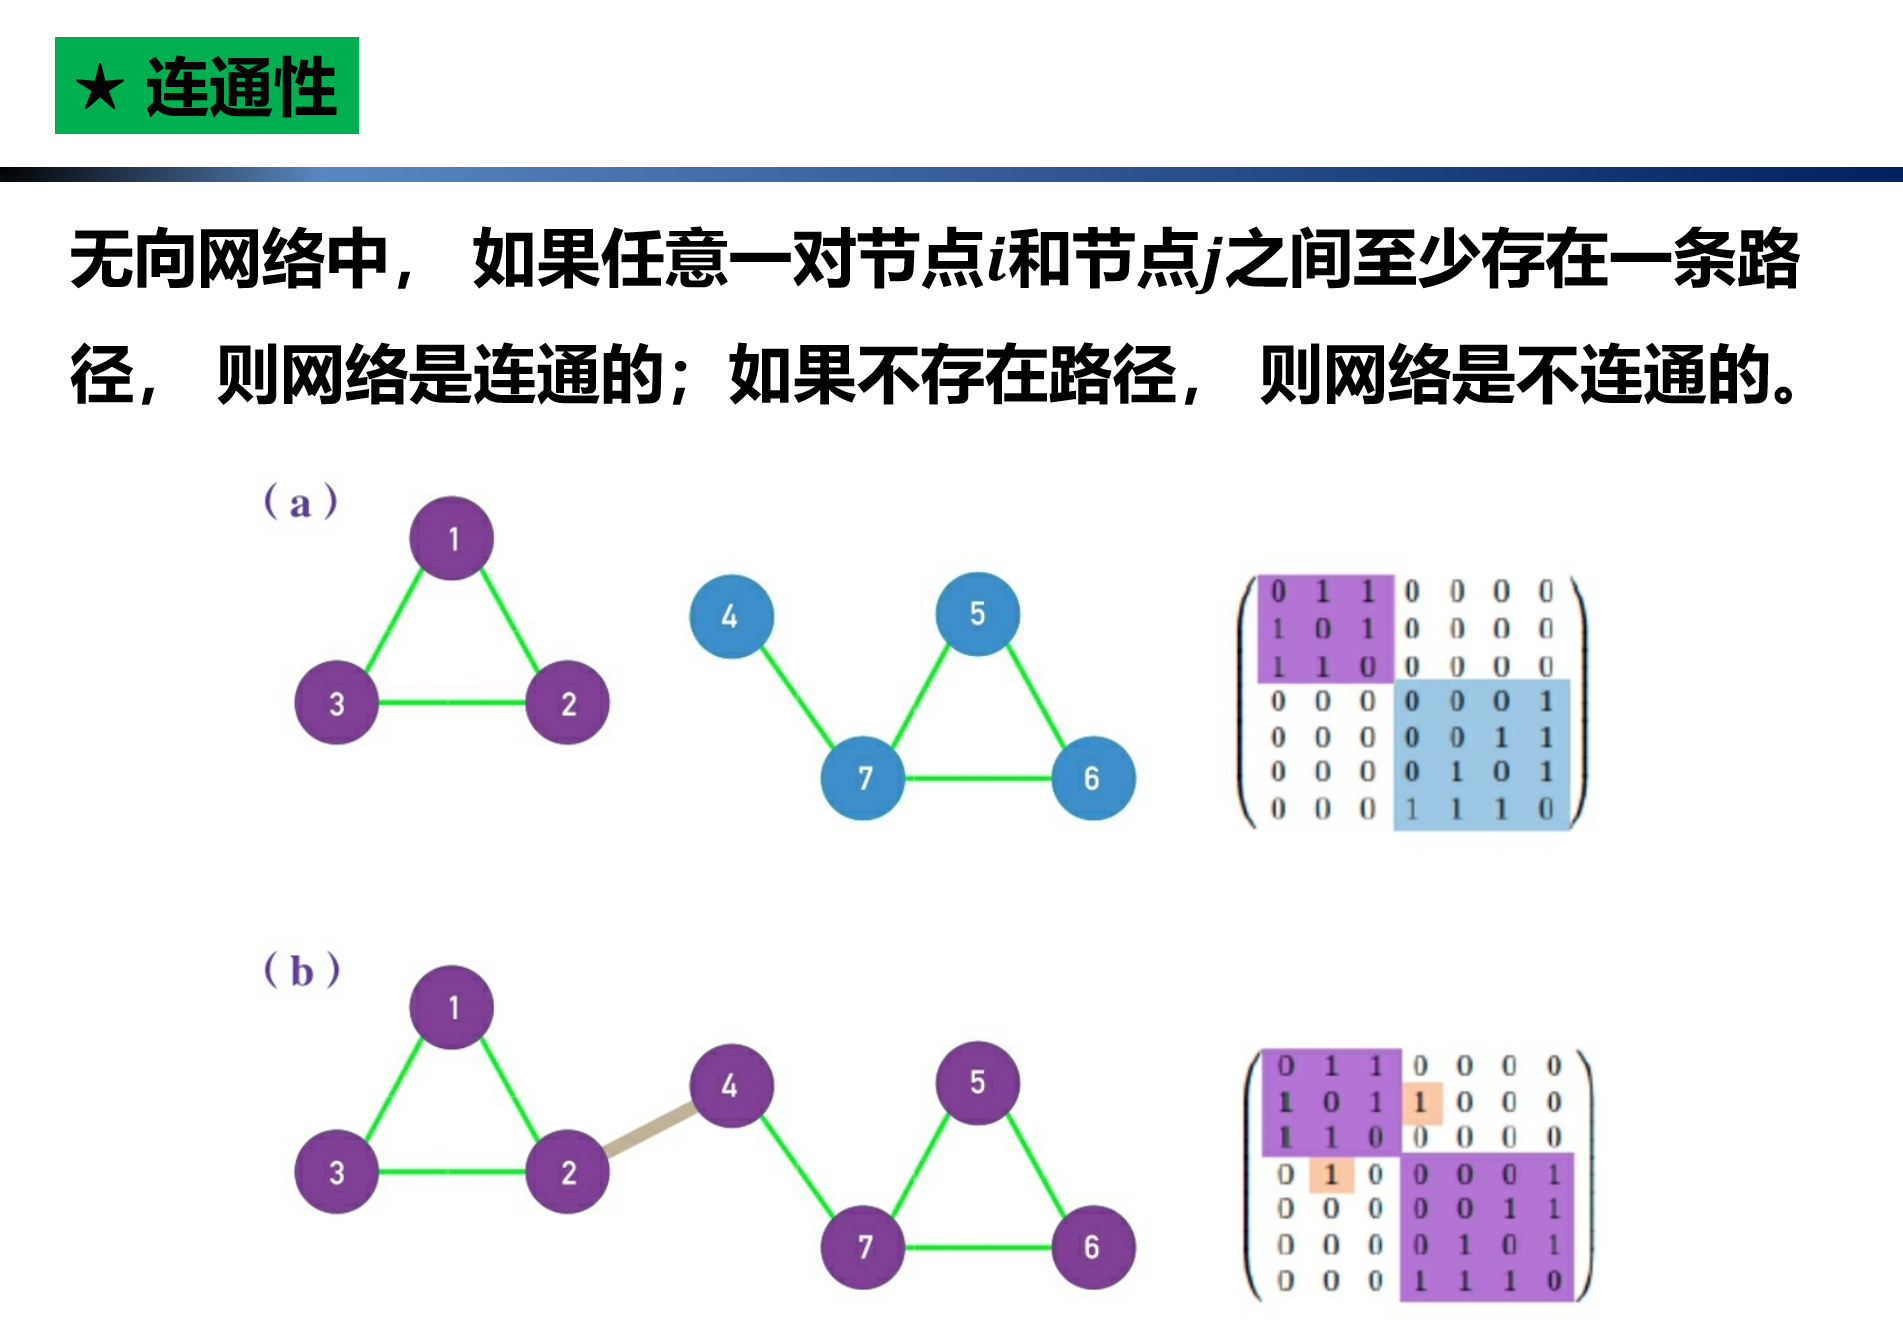

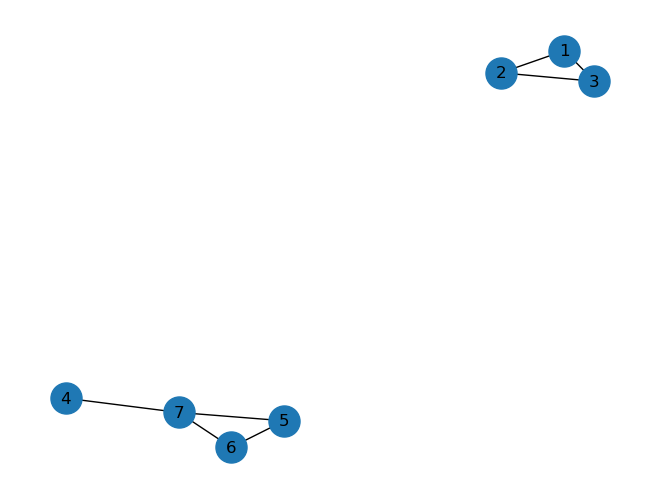

In [30]:
Ga = nx.Graph()
Ga.add_nodes_from([1,2,3,4,5,6,7])
Ga.add_edges_from([(1,2),(1,3),(2,3),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Ga, node_size=500, with_labels=True)

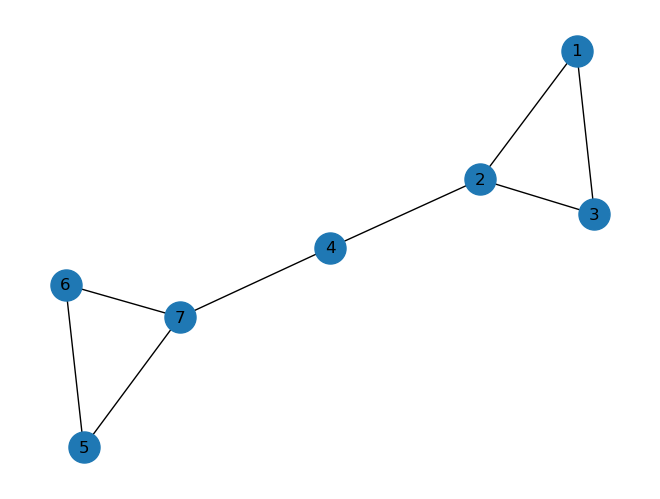

In [31]:
Gb = nx.Graph()
Gb.add_nodes_from([1,2,3,4,5,6,7])
Gb.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Gb, node_size=500, with_labels=True)

In [32]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


### 6.网络的局部集聚系数、平均集聚系数以及全局集聚系数

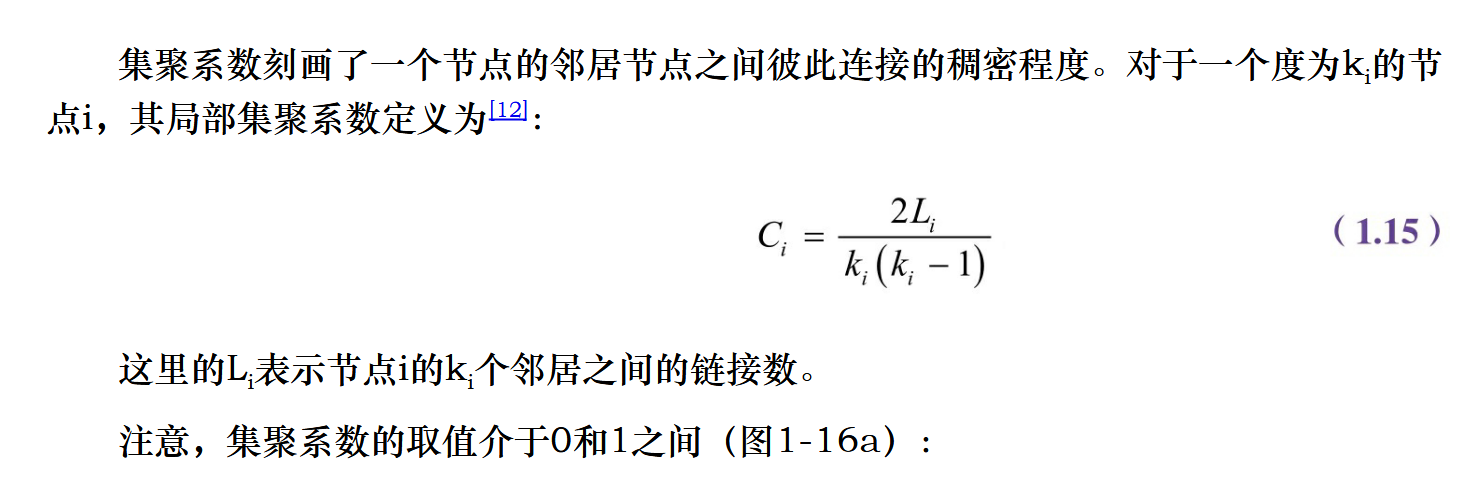
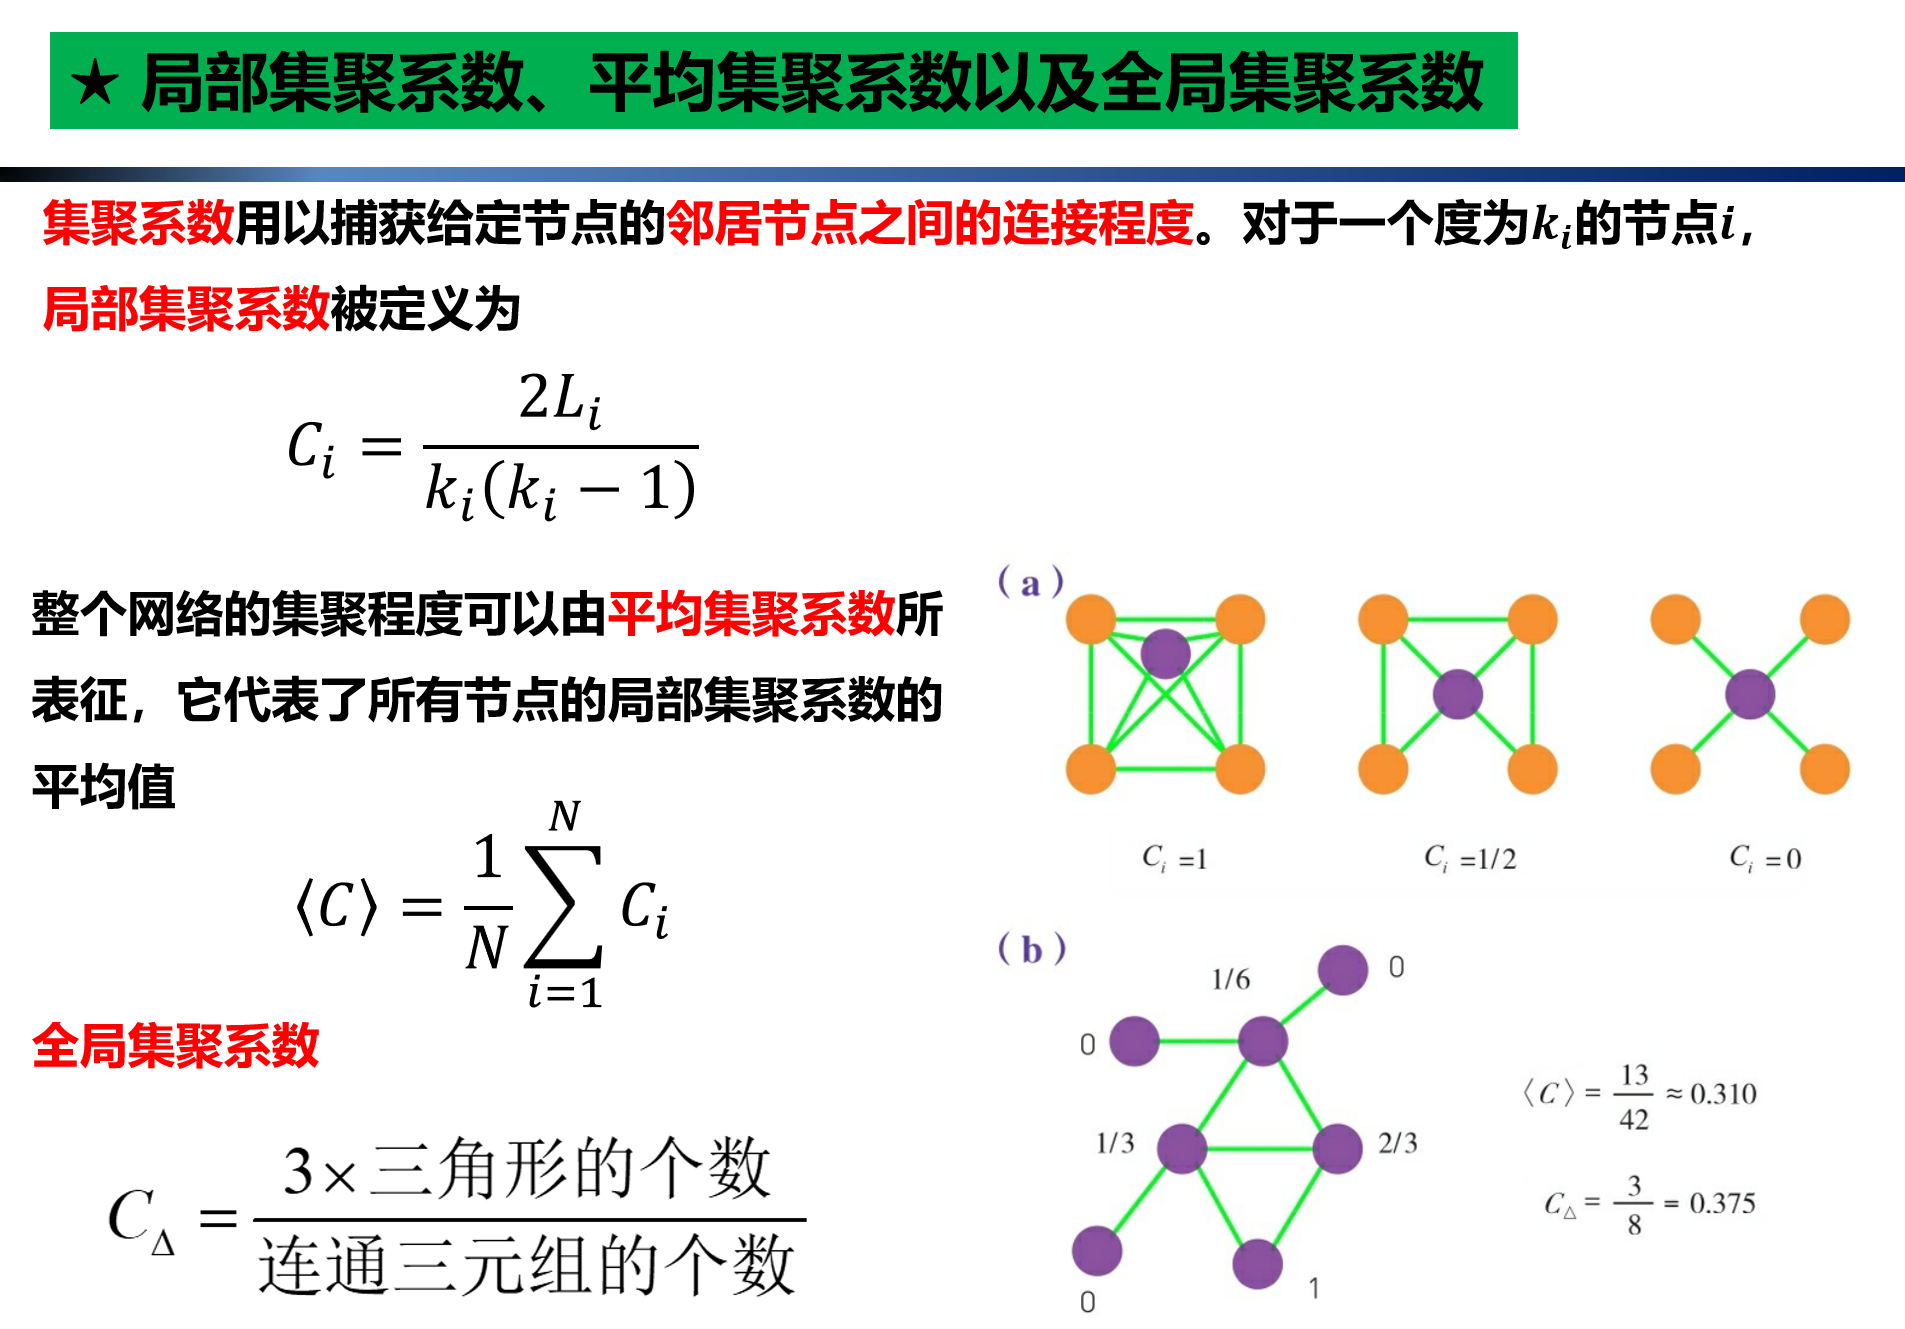 
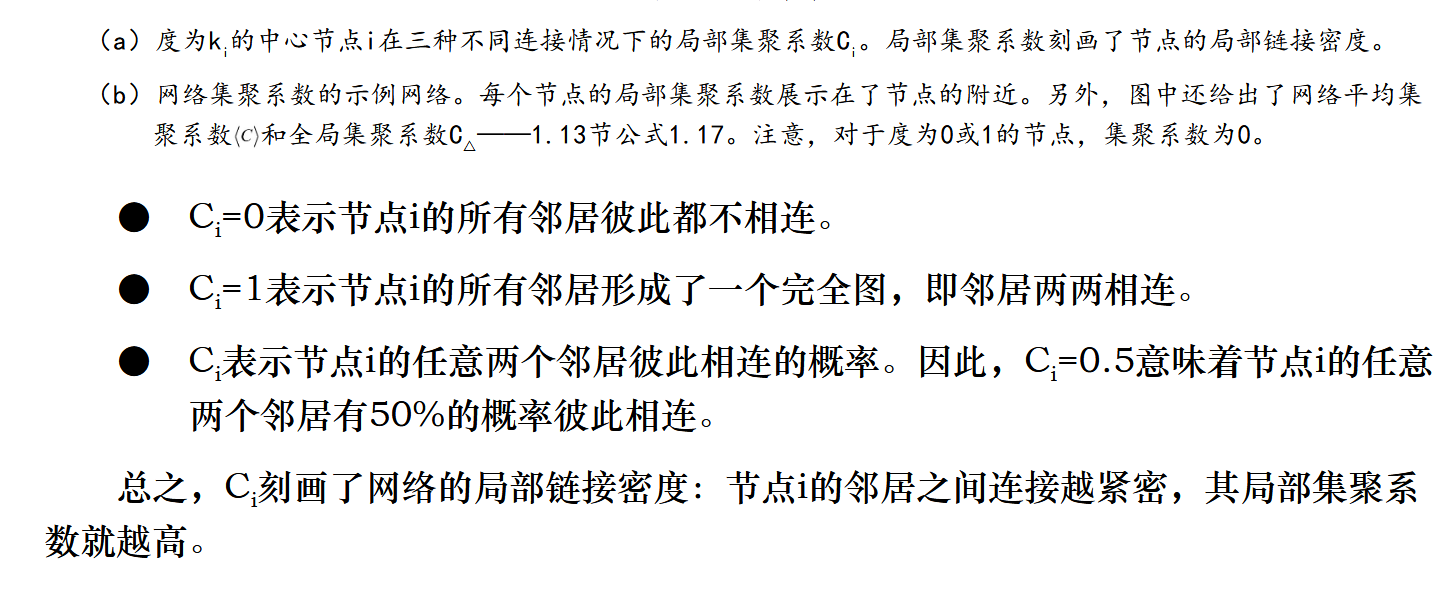

#### 创建一个简单无向无权图来展开演示

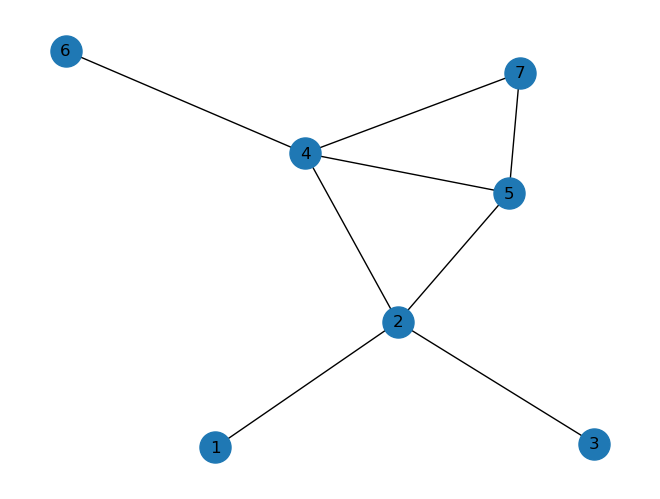

In [33]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [34]:
# 节点的局部集聚系数
# 返回字典格式，键为节点标签，值为对应的节点局部集聚系数
print(nx.clustering(G))

{1: 0, 2: 0.16666666666666666, 3: 0, 4: 0.3333333333333333, 5: 0.6666666666666666, 6: 0, 7: 1.0}


In [35]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [36]:
# 全局集聚系数
print(nx.transitivity(G))

0.375


In [37]:
# # 若图G为加权图，可增加权重参数来求解局部集聚系数和平均集聚系数
# nx.clustering(G, weight='weight')
# nx.average_clustering(G, weight='weight')